## Definition

A decomposition of a Hermitian, positive-definite matrix into the product of a lower triangular matrix and its conjugate transpose:

 $ A = L  L^T$
 

*What does this mean?* Nothing more than what is stated above: a matrix factorization, albeit a very efficient one.

## Applications

### **1) Solving a linear system of equations.**

If we want to solve for $x$ in $Ax = b$, first define:

&nbsp;&nbsp;&nbsp;&nbsp; $LL^Tx=b$

&nbsp;&nbsp;&nbsp;&nbsp; $Lc=b$

From here we can solve efficiently for $c$ via *forward substitution*, and finally solve for $x$ via *backward substitution*:

&nbsp;&nbsp;&nbsp;&nbsp; $L^Tx=c$

There are other ways of doing it, but this implementation can be faster.

### **2) Solving a linear regression.**

Similar to the case above, we want to solve for $\beta$ on $Y = X \beta$. 

First we derive the least-squares solution for this problem:

&nbsp;&nbsp;&nbsp;&nbsp; $min(SSR(\beta)) = min(Y-X \beta)^T(Y-X \beta)$

&nbsp;&nbsp;&nbsp;&nbsp; $\frac{\delta SSR(\beta)}{\delta \beta} = -2X^T(Y-X \beta)=0$

&nbsp;&nbsp;&nbsp;&nbsp; $XX^T \beta = X^T Y$

Applying the Cholesky decomposition on $XX^T$:

&nbsp;&nbsp;&nbsp;&nbsp; $L^T L \beta = X^T Y$

Using a similar logic as on **(1)**, we can solve for $\beta$ via:

&nbsp;&nbsp;&nbsp;&nbsp; $Lc = XY$

&nbsp;&nbsp;&nbsp;&nbsp; $L^T \beta = c$

### **2) Create correlated variables in Monte Carlo simulation.**

This is one of the more interesting use cases. Suppose we want to transform a set of normal IID variables into correlated ones. For the case of 2 variables we know that:

&nbsp;&nbsp;&nbsp;&nbsp; $e_1 = x_1$

&nbsp;&nbsp;&nbsp;&nbsp; $e_2 = \rho x_1 + x_2\sqrt{(1-\rho^2)}$

For a larger number of variables the relationship gets tricky. However we can design a correlation matrix $\Sigma$, perform Cholesky decomposition $\Sigma=RR^T$, and then generate correlated series as:

&nbsp;&nbsp;&nbsp;&nbsp; $e = Rx$

## Example: Time Series Generation

To be less abstract, lets look at a concrete example. Supose we are examining the returns of 3 financial assets, for which we derive a historical correlation matrix. In order to test a financial hypothesis, we would like to simulate *alternative histories* for the returns of these stocks, under the constrain that they follow the dynamics encoded in the correlation matrix. We can use the Cholesky decomposition for this purpose.

Let's start by loading `numpy` and defining our target correlation matrix.

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['science','ieee', 'notebook'])

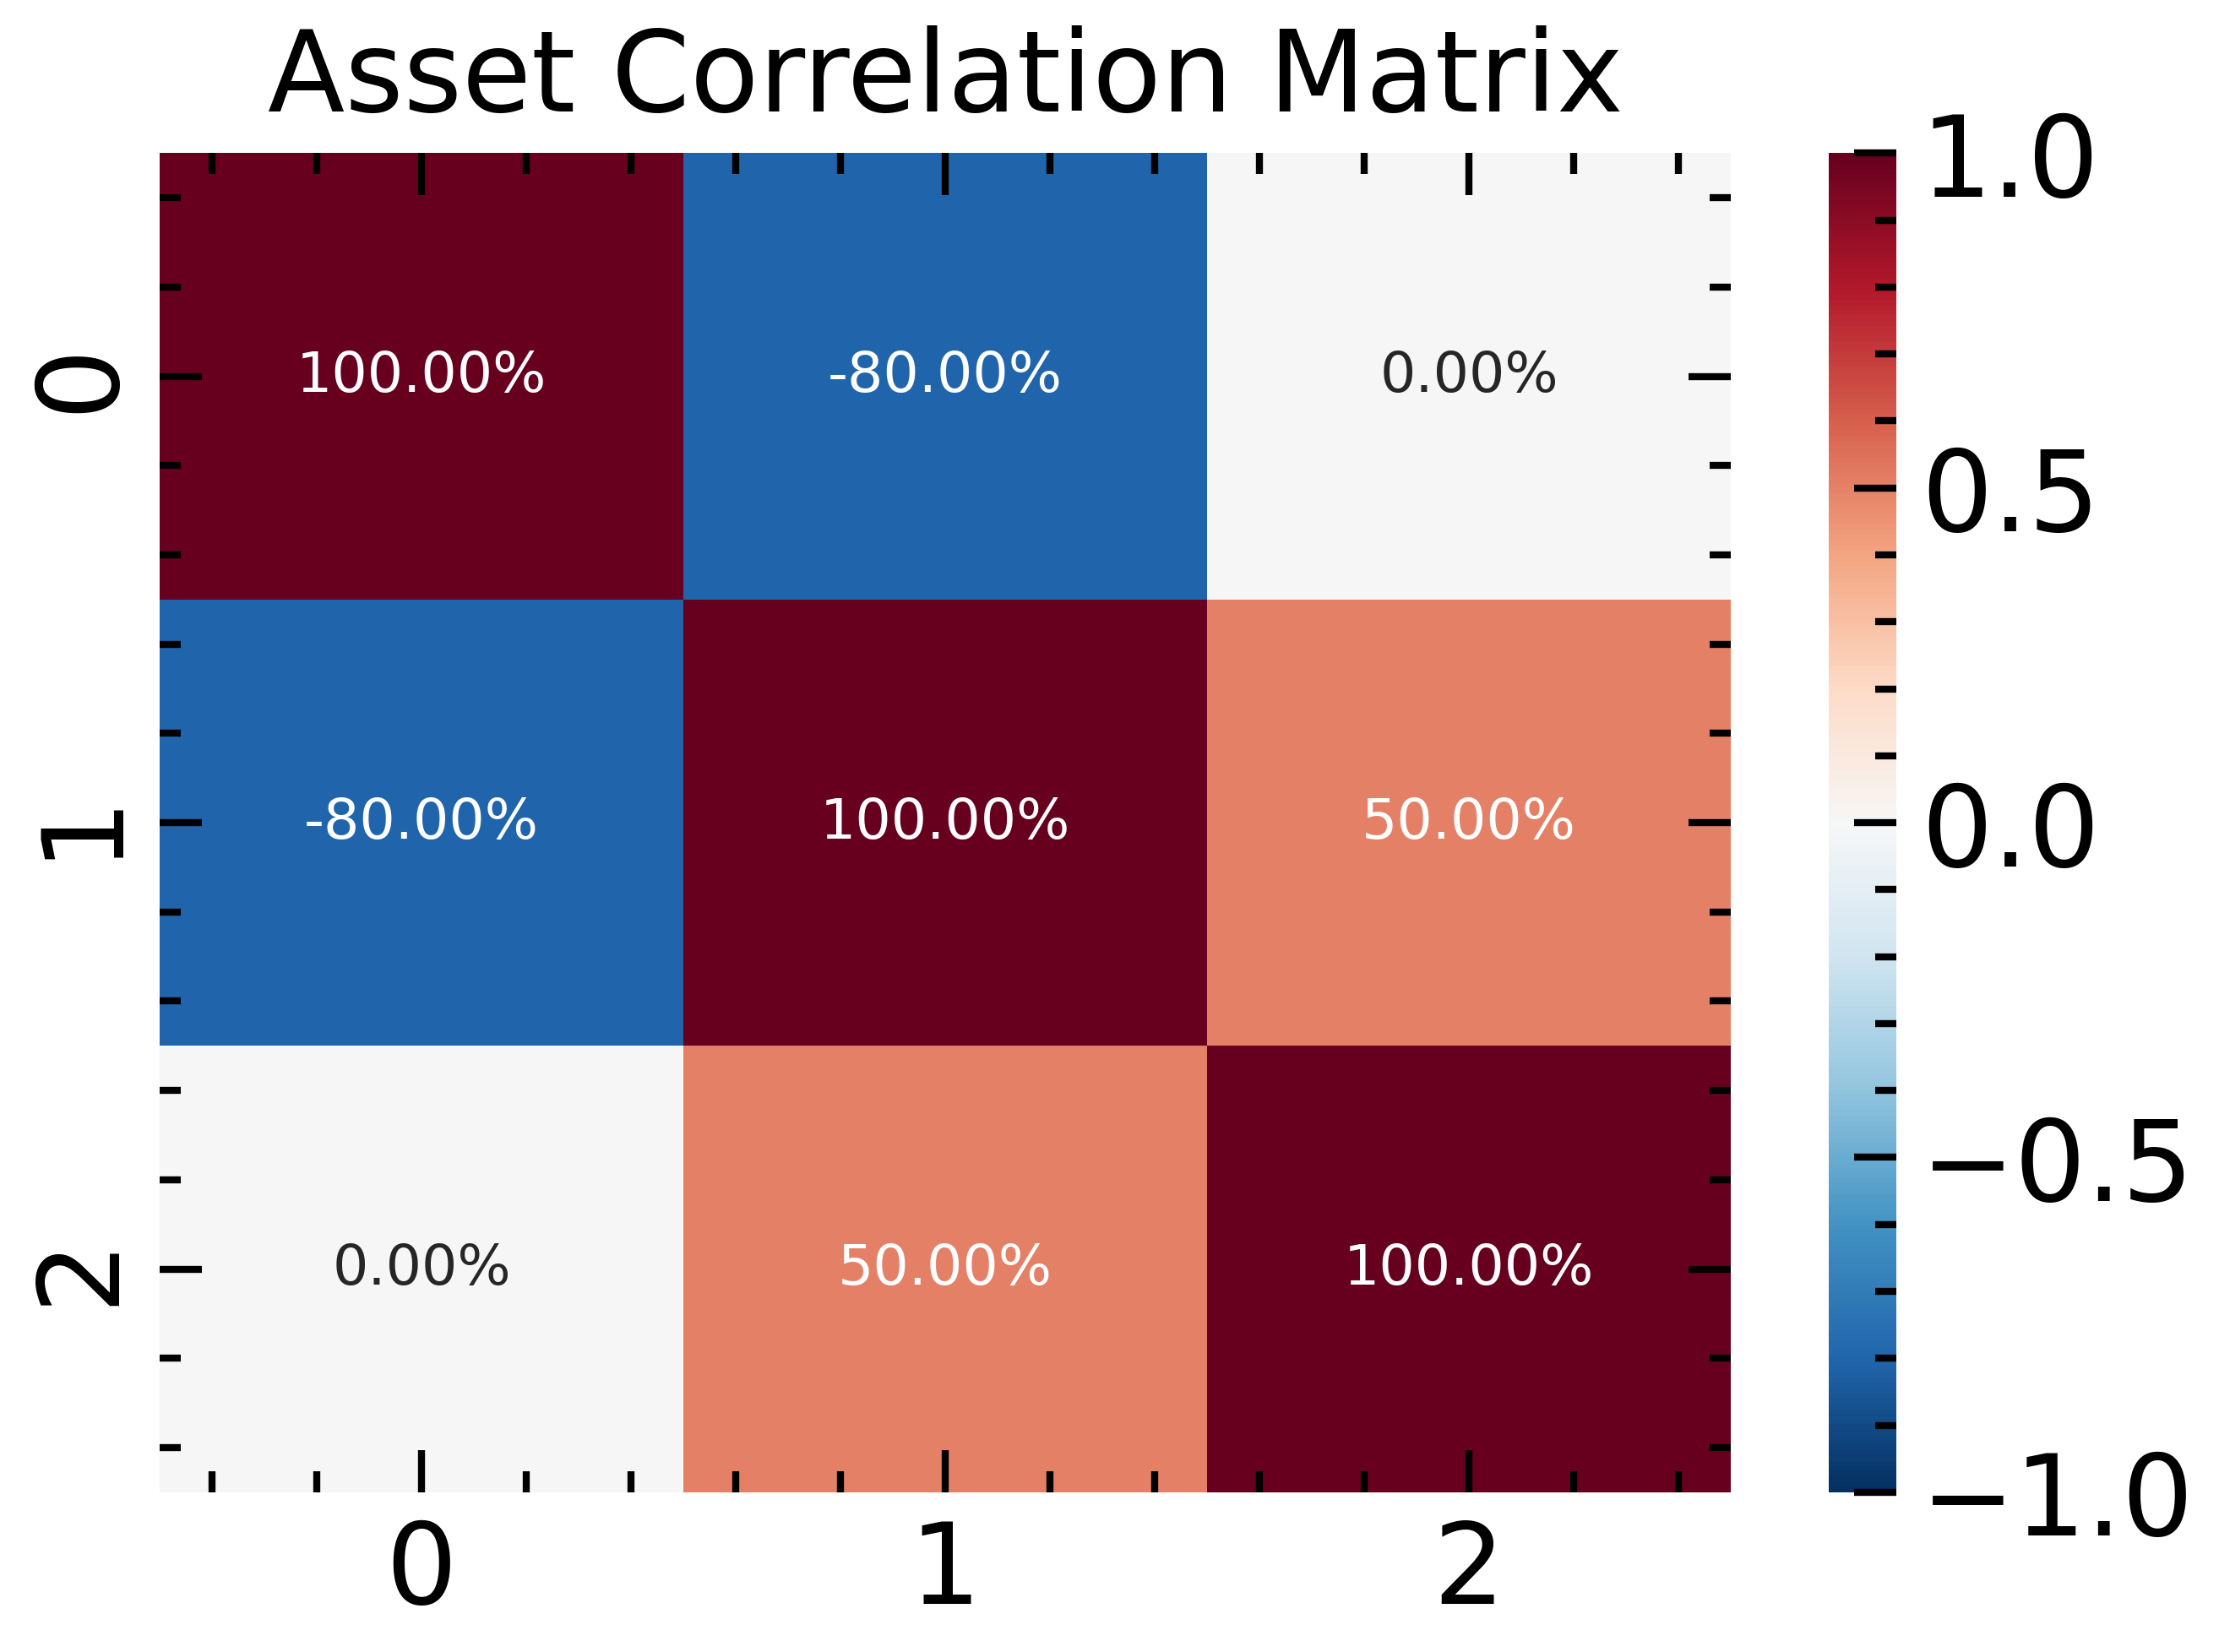

In [61]:
corr = np.array([[ 1.0, -0.8, 0.0],
                 [-0.8,  1.0, 0.5],
                 [ 0.0,  0.5, 1.0]])

std_devs = np.array([0.01, 0.01, 0.01])
covs = np.diag(std_devs) @ corr @ np.diag(std_devs)

fig, ax = plt.subplots(figsize=(5, 3.5));
sns.heatmap(corr, cmap='RdBu_r', ax=ax, annot=True, 
            fmt='0.2%', vmin=-1, vmax=1)
ax.set_title('Asset Correlation Matrix');

Now we generate 3 uncorrelated time series, which we will use as the basis for our simulation experiment.

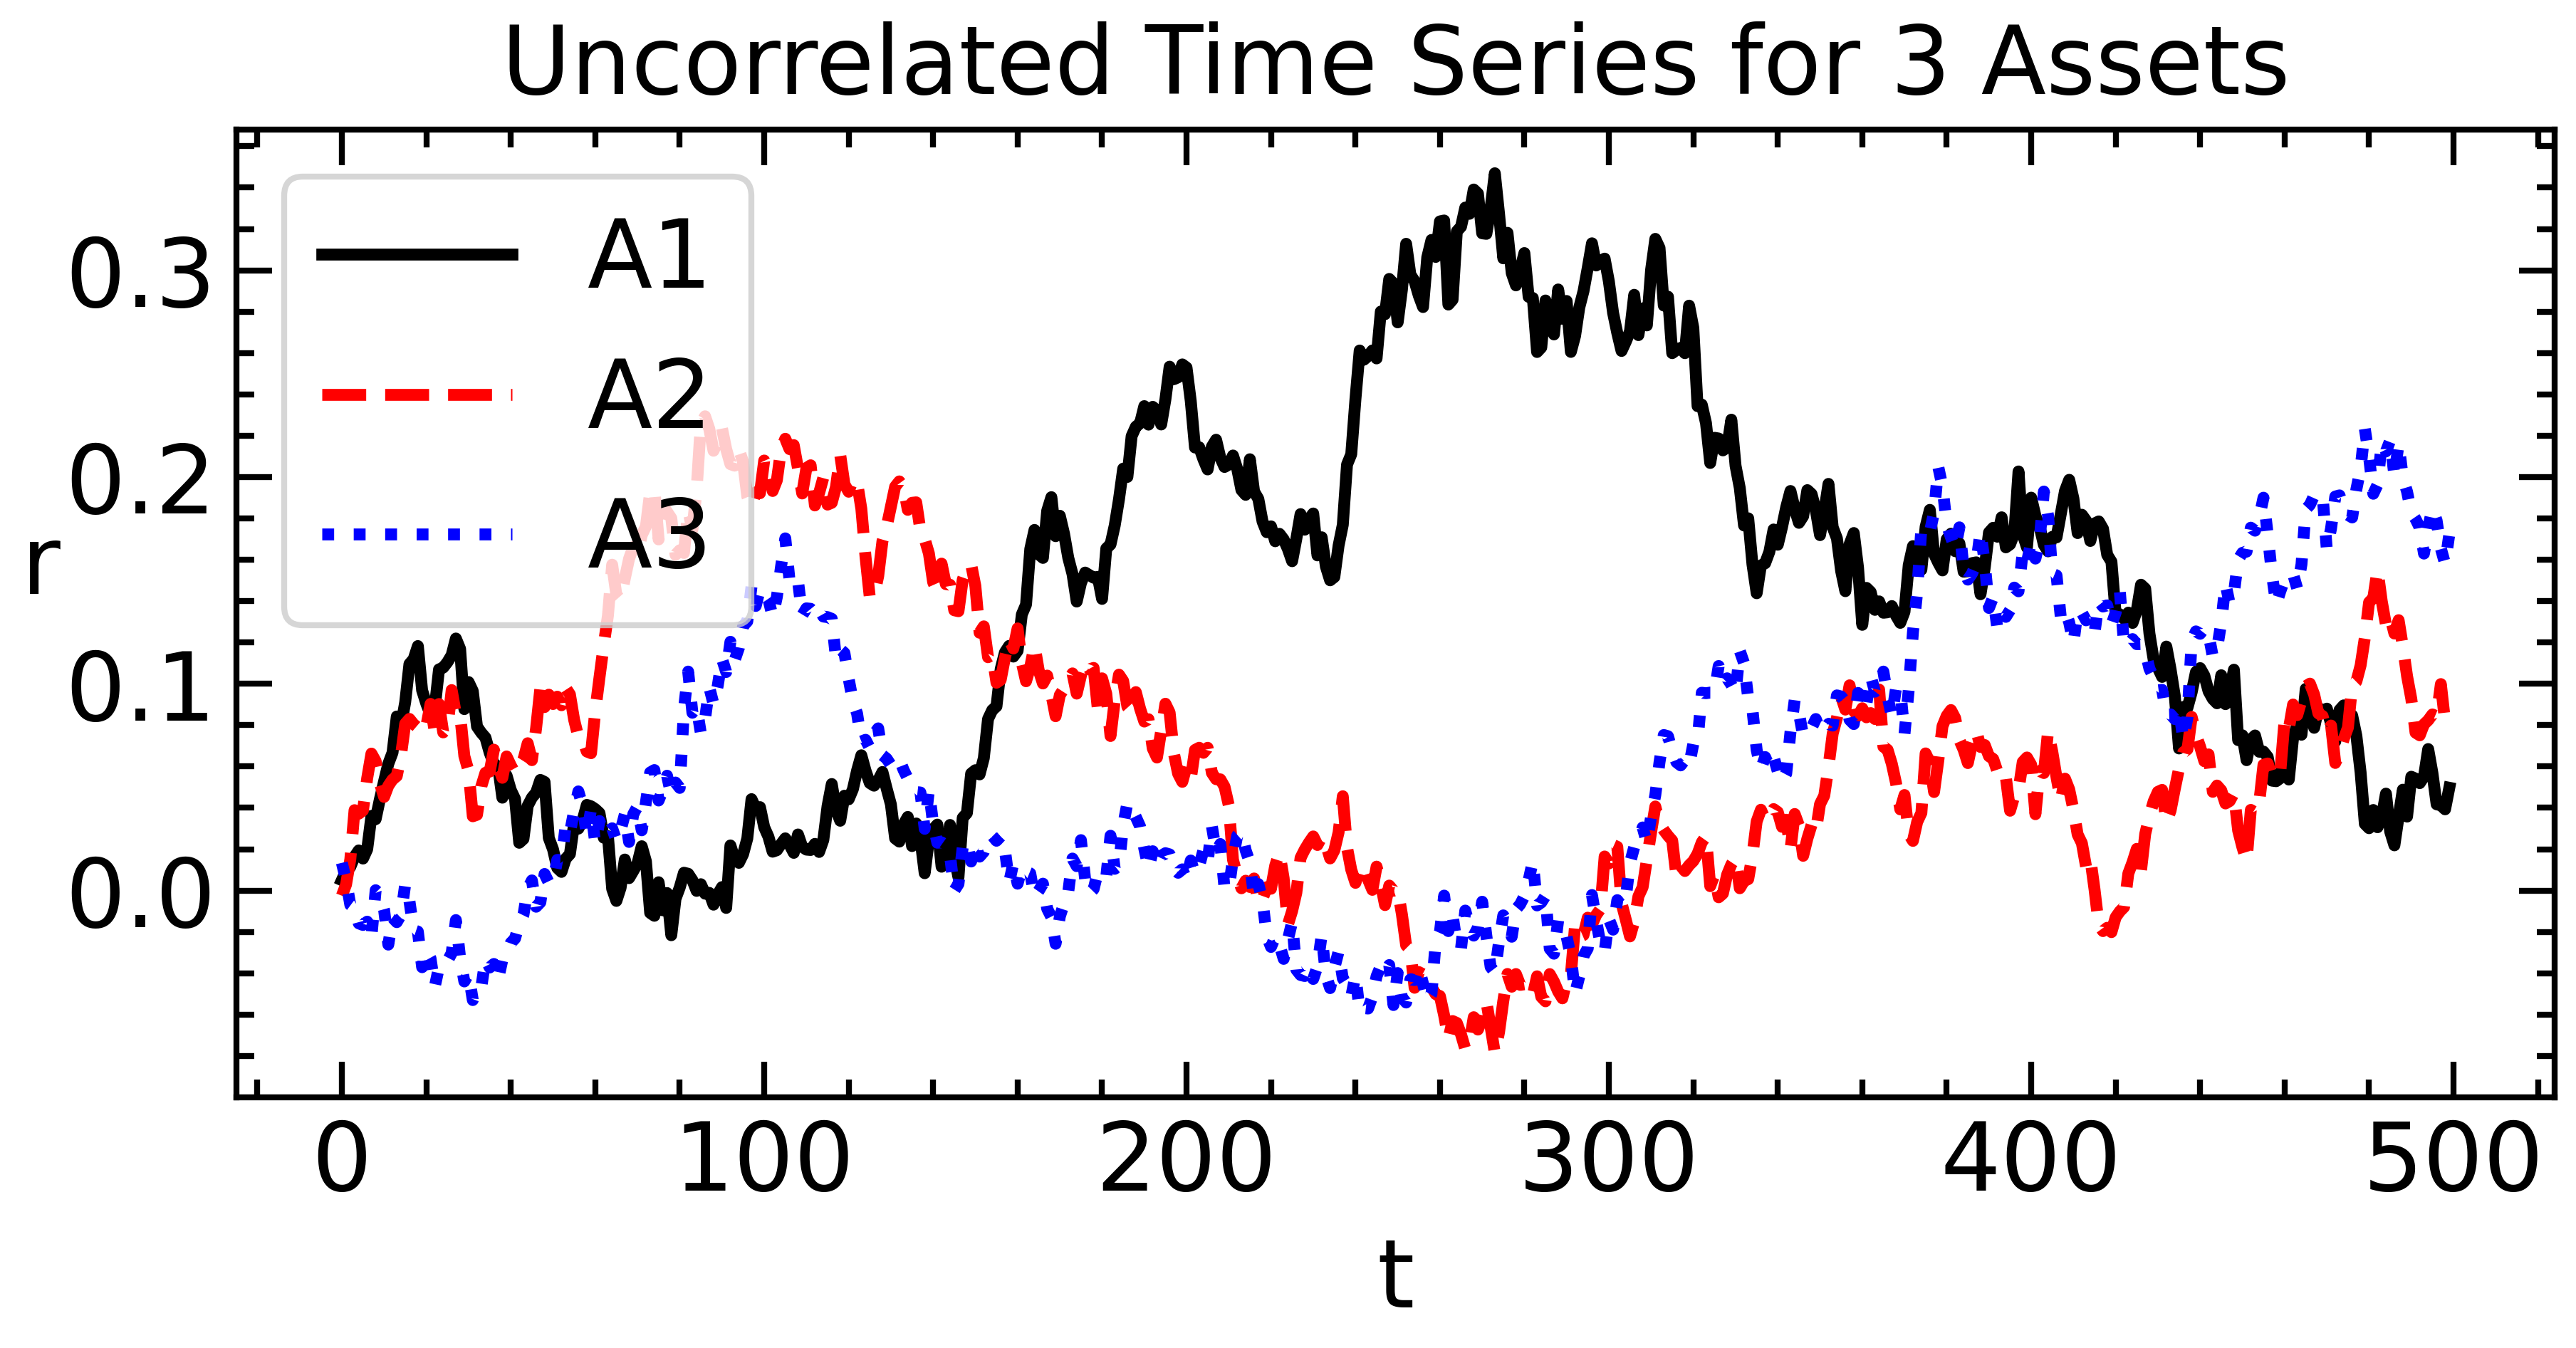

In [58]:
## Random returns.
X = np.random.normal(loc=0, scale=0.01, size=(500, 3))

fig, ax = plt.subplots(figsize=(7,3));
ax.plot((1+X).cumprod(axis=0)-1)
ax.set_title('Uncorrelated Time Series for 3 Assets')
ax.set_ylabel('r', rotation=0)
ax.set_xlabel('t')
ax.legend(labels=['A1', 'A2', 'A3'],
          frameon=True);

Following the equations from the *Monte Carlo simulation* section:

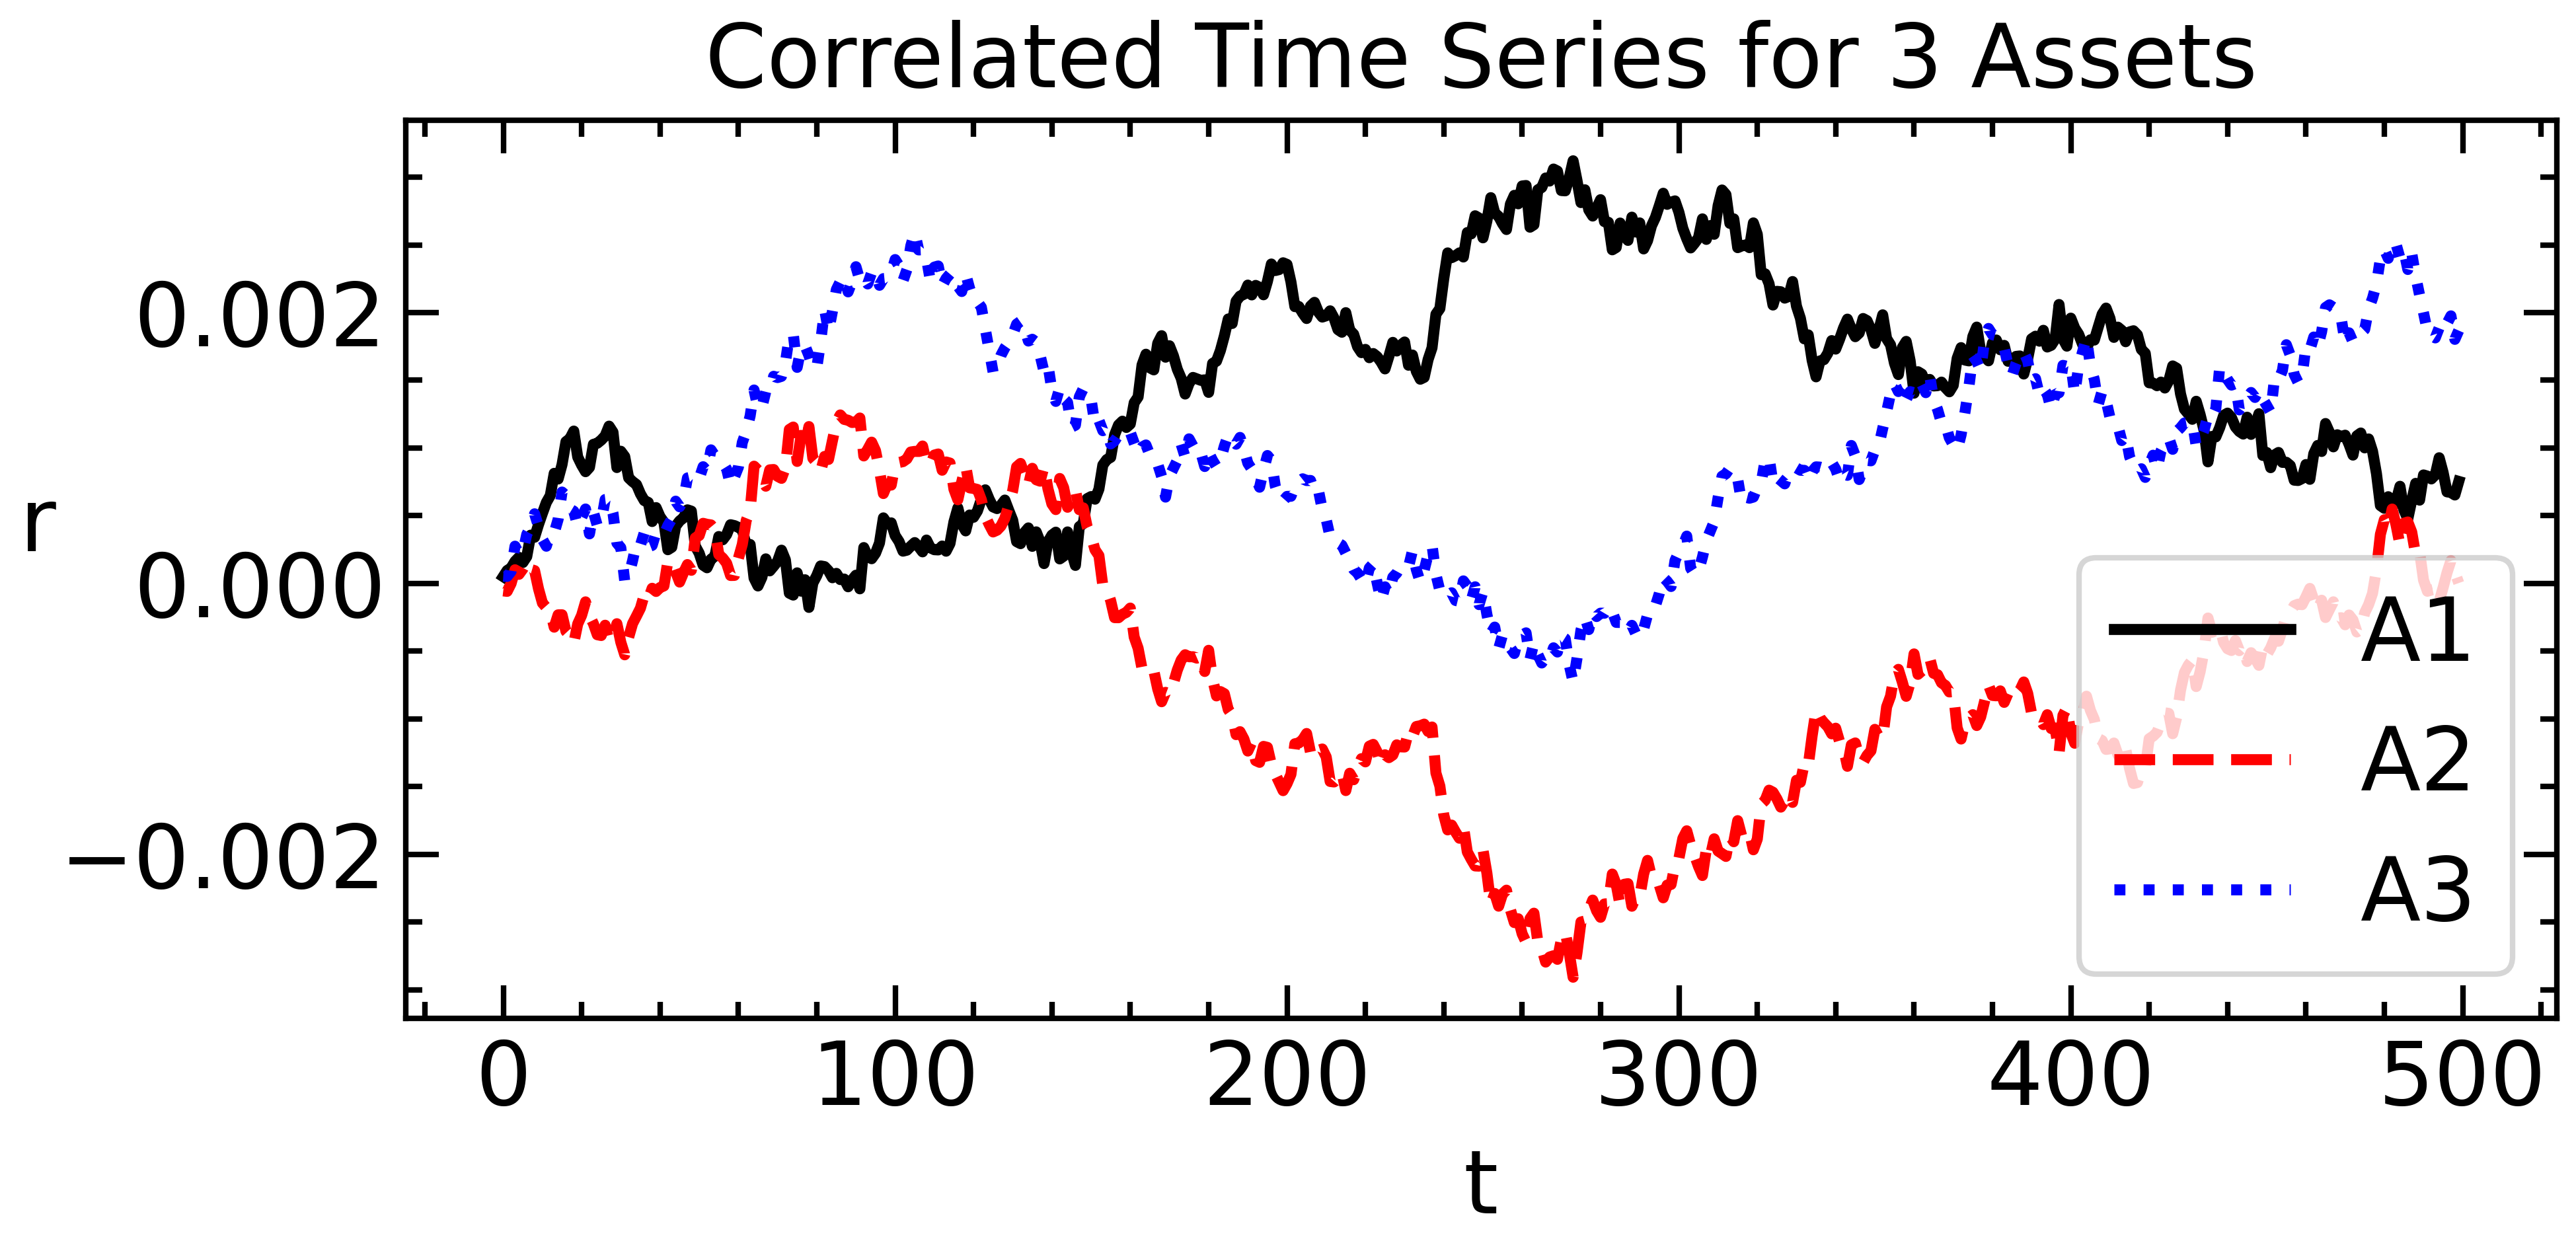

In [59]:
L = np.linalg.cholesky(covs)
X1 = (L @ X.T).T

fig, ax = plt.subplots(figsize=(7,3));
ax.plot((1+X1).cumprod(axis=0)-1)
ax.set_title('Correlated Time Series for 3 Assets')
ax.set_ylabel('r', rotation=0)
ax.set_xlabel('t')
ax.legend(labels=['A1', 'A2', 'A3'],
          frameon=True);

Text(0.5, 1.0, 'Asset Correlation Matrix')

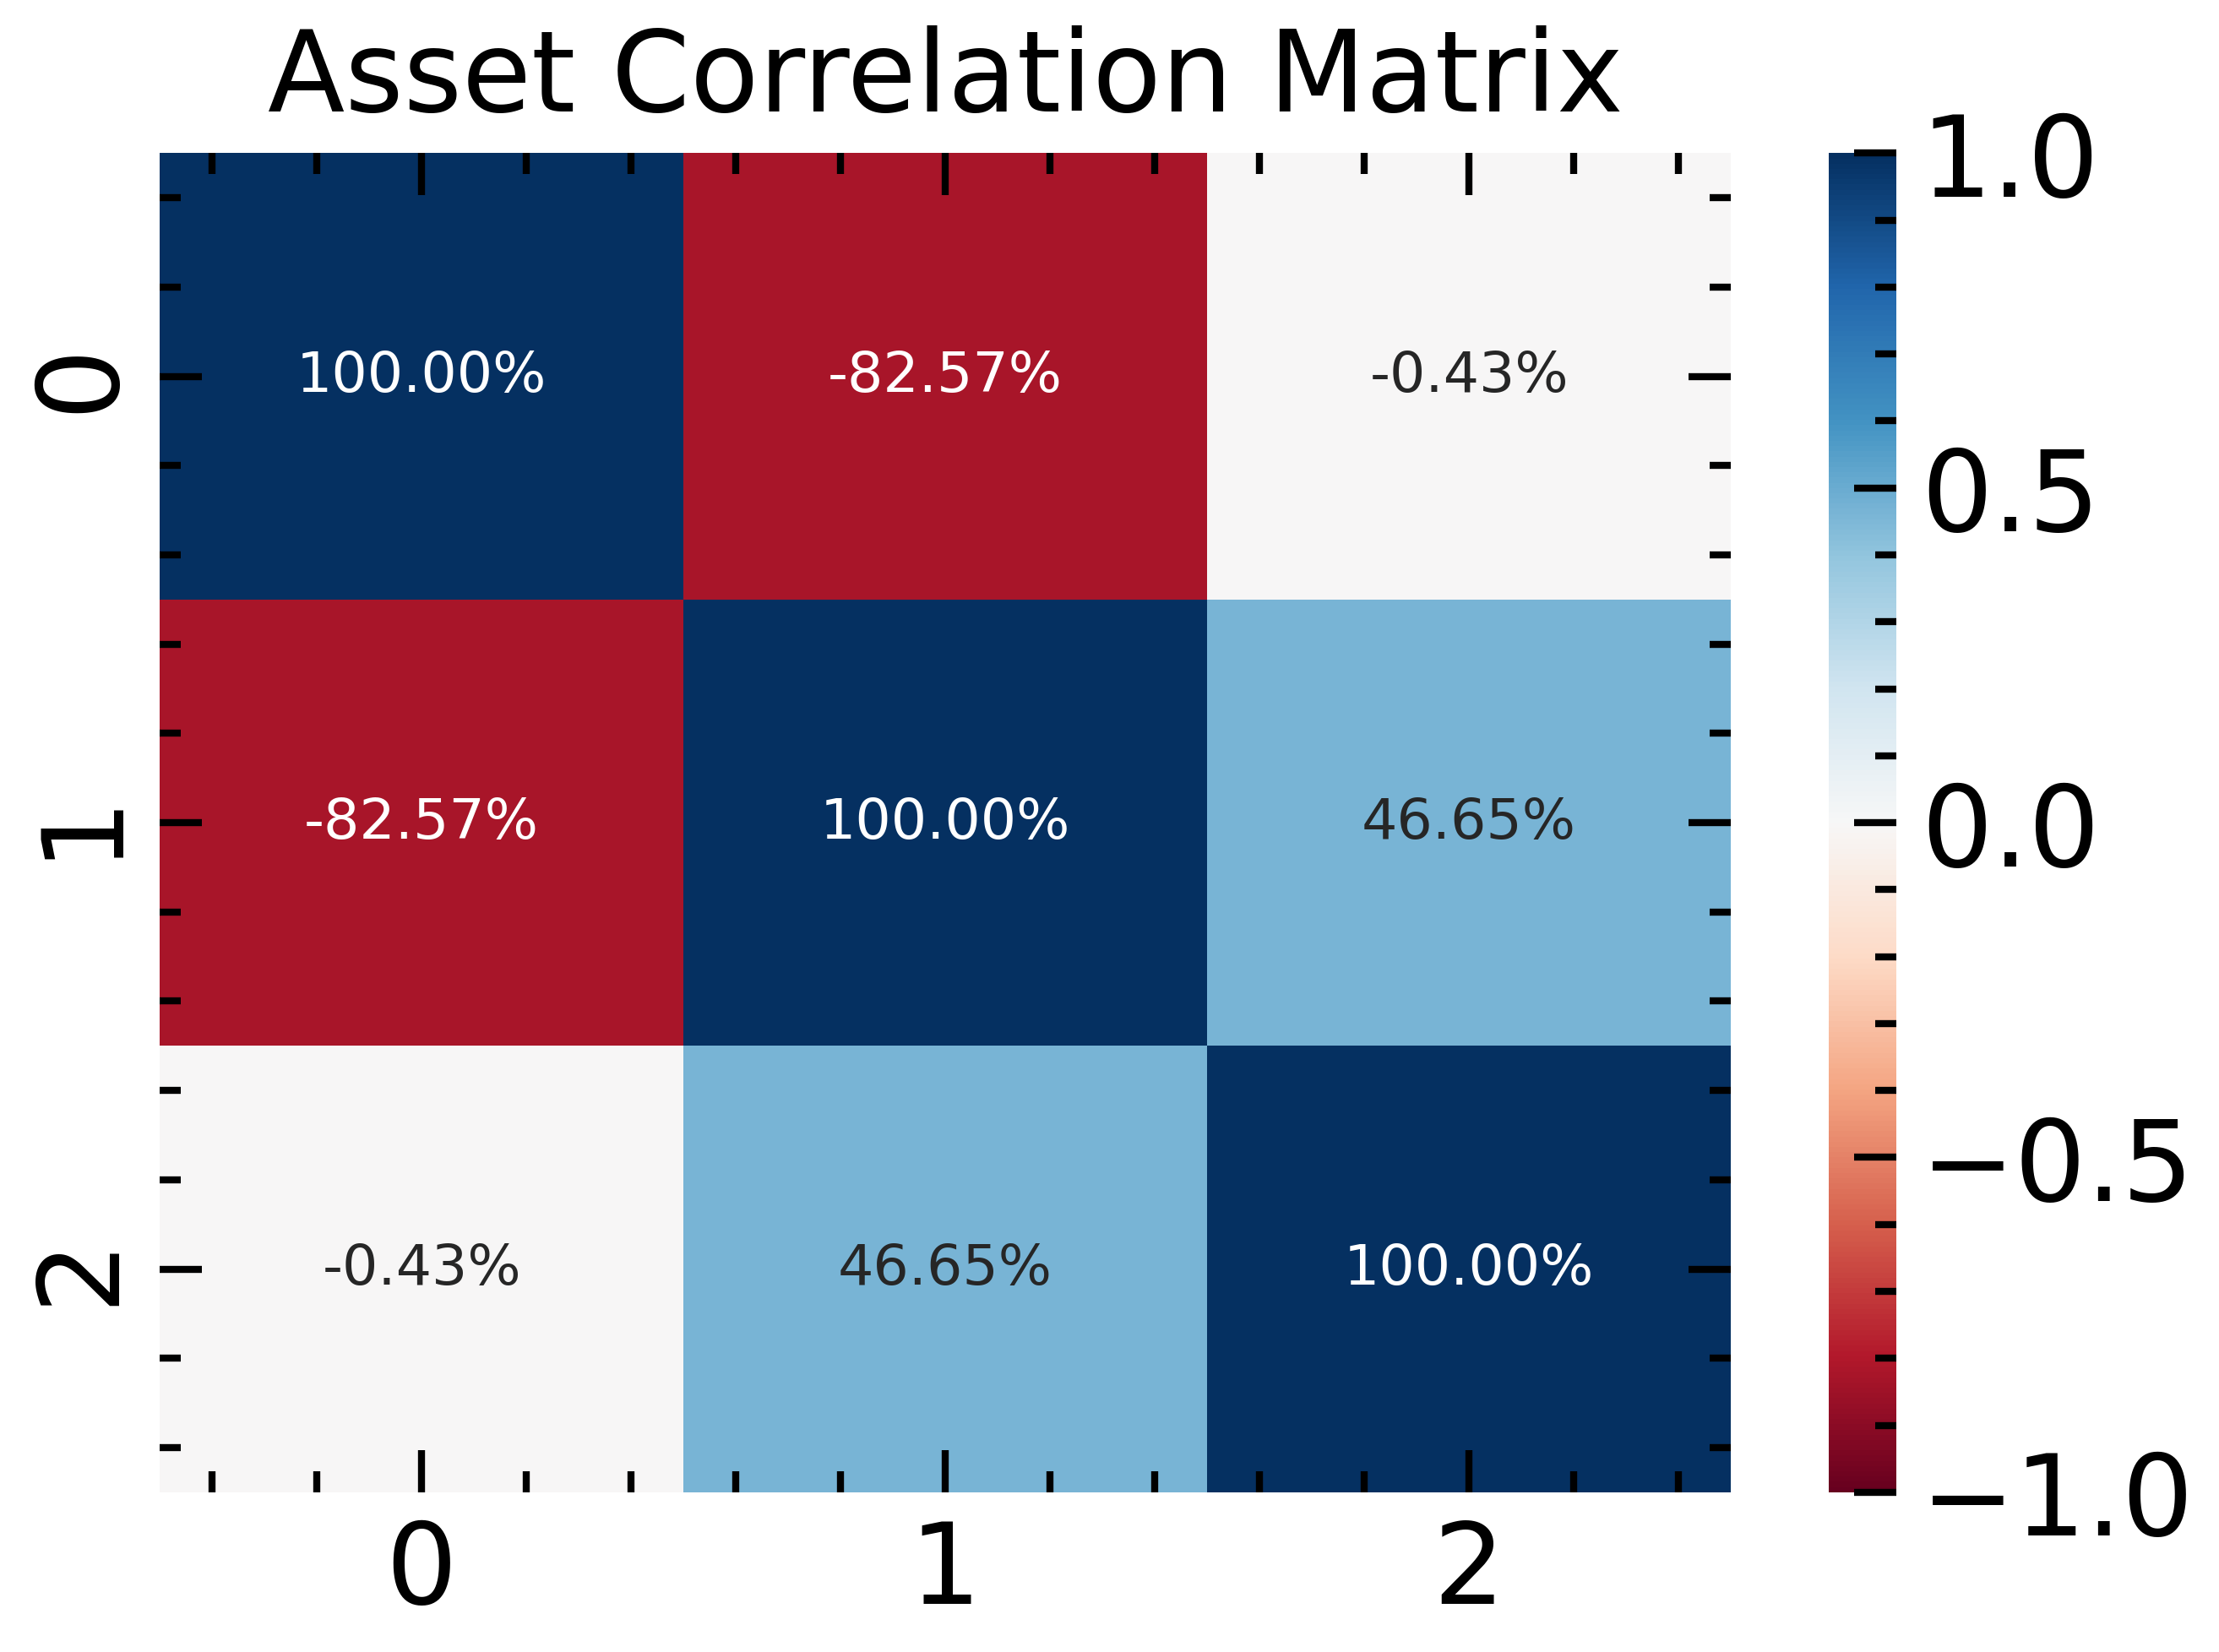

In [62]:
corr_emp = pd.DataFrame(X1).corr().values

fig, ax = plt.subplots(figsize=(5, 3.5));
sns.heatmap(corr_emp, cmap='RdBu', ax=ax, annot=True, 
            fmt='0.2%', vmin=-1, vmax=1)
ax.set_title('Asset Correlation Matrix')

As we see the results are pretty close to the original correlation matrix. This way we can generate *synthetic time series*, which can be useful for a number of purposes.

## Conclusions
On its own the Cholesky decomposition is simply a matrix manipulation technique. The procedure itself not that interesting; what is interesting is what we can do with the transformed data representation, which we can get in an efficient way.